<a href="https://colab.research.google.com/github/bonsoul/Energy-Consumption---Time-Series-Analysis/blob/main/Energy_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energy Consumption Prediction Using Time Series Analysis

### To predict hourly energy consumption using historical data and machine learning techniques.

In [ ]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import plotly.express as px
import warnings
color = sns.color_palette()
warnings.filterwarnings('ignore')

**2. Data Loading and Preprocessing**

In [ ]:
data = pd.read_csv('/PJME_hourly.csv')
data.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [ ]:
data.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [ ]:
#checking null values

data.isnull().sum()

Datetime    0
PJME_MW     0
dtype: int64

In [ ]:
# setting the datetime index

data.set_index('Datetime')

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


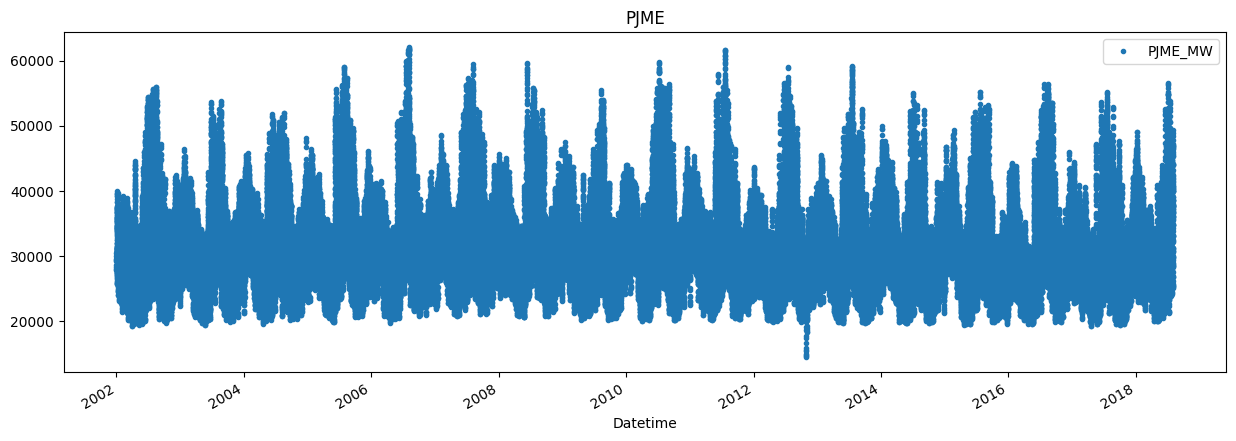

In [ ]:
#visualizing the data

data.plot(style='.', figsize= (15,5), title = 'PJME')
plt.show()

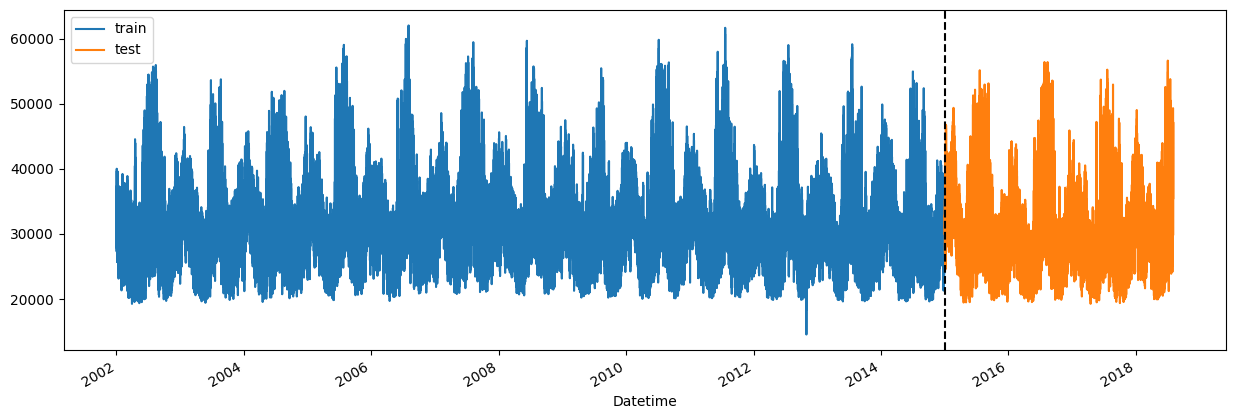

In [ ]:
# train test split

train = data.loc[data.index < '01-01-2015']
test = data.loc[data.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label = 'Training Set')
test.plot(ax=ax, label = 'Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Testing Set'])
plt.legend(['train'] + ['test'])
plt.show()


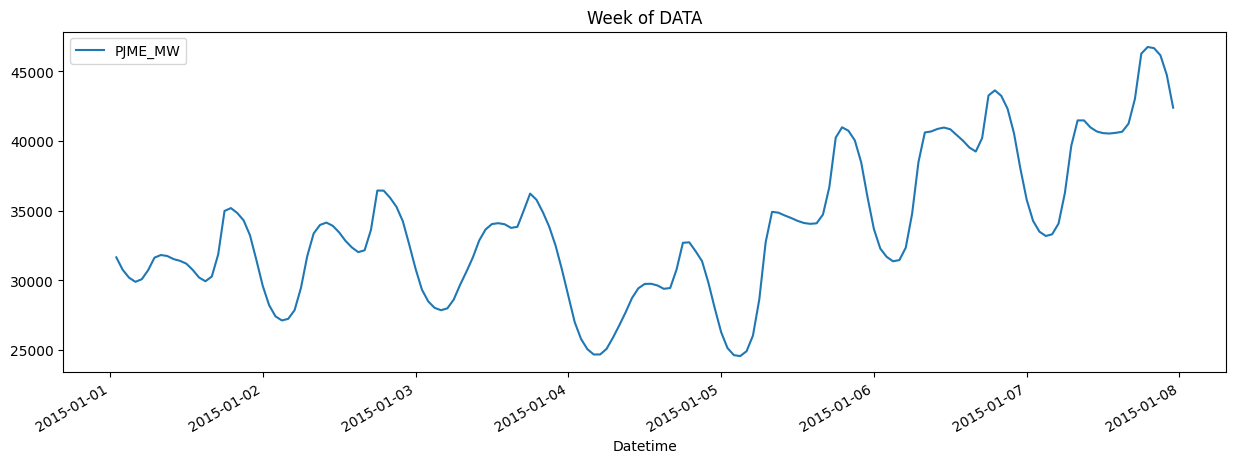

In [ ]:
data.loc[(data.index > '01-01-2015') & (data.index < '01-08-2015')].plot(figsize=(15,5), title = 'Week of DATA')
plt.show()

In [ ]:
# feature engineering
def create_features(df):
   df['hour'] = df.index.hour
   df['day'] = df.index.day
   df['dayofweek'] = df.index.dayofweek
   df['month'] = df.index.month
   df['year'] = df.index.year
   df['dayofyear'] = df.index.dayofyear
   df['quarter'] = df.index.quarter
   df['weekofyear'] = df.index.isocalendar().week # Use isocalendar() to get week of year
   return df

In [ ]:
data = create_features(data)
data.head()

,Datetime,PJME_MW,hour,day,dayofweek,month,year,dayofyear,quarter,weekofyear
Datetime,,,,,,,,,,
2002-12-31 01:00:00,2002-12-31 01:00:00,26498.0,1,31,1,12,2002,365,4,1
2002-12-31 02:00:00,2002-12-31 02:00:00,25147.0,2,31,1,12,2002,365,4,1
2002-12-31 03:00:00,2002-12-31 03:00:00,24574.0,3,31,1,12,2002,365,4,1
2002-12-31 04:00:00,2002-12-31 04:00:00,24393.0,4,31,1,12,2002,365,4,1
2002-12-31 05:00:00,2002-12-31 05:00:00,24860.0,5,31,1,12,2002,365,4,1


**Visualizing our Feature and Target Relationship**


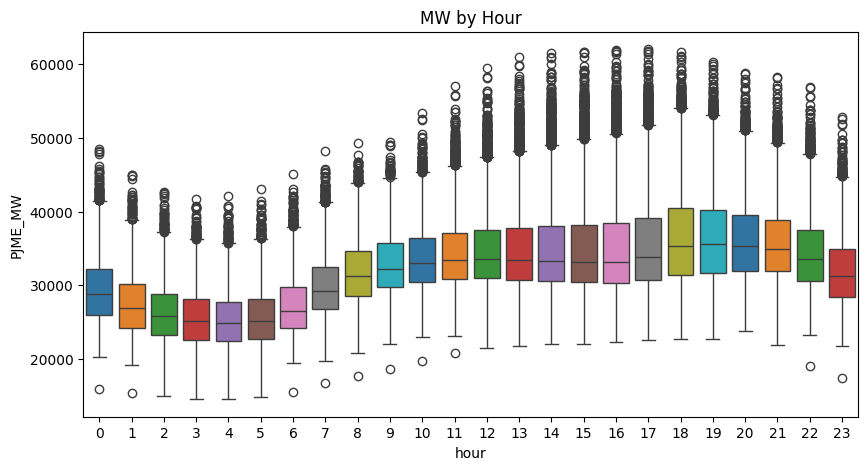

In [ ]:
#visualizing

fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=data, x='hour', y='PJME_MW',palette = color)
ax.set_title('MW by Hour')
plt.show()

EDA revealed a strong seasonal pattern in energy consumption, with  peak hours from 11 am to 8pm in the evening

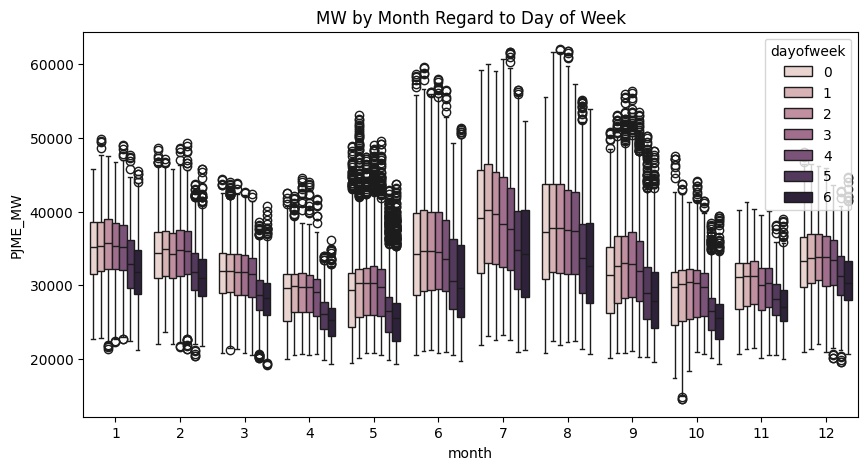

In [ ]:
#visualizing

fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=data, x='month', y='PJME_MW',  hue='dayofweek')
ax.set_title('MW by Month Regard to Day of Week')
plt.show()

### EDA revealed a strong seasonal pattern in energy consumption, with higher usage during weekdays and peak hours

#Defining the model

In [ ]:
train = create_features(train)
test = create_features(test)

FEATURES = ['hour', 'day', 'dayofweek', 'month', 'year', 'dayofyear', 'quarter', 'weekofyear']
TARGET = 'PJME_MW'

x_train = train[FEATURES]
y_train = train[TARGET]

x_test = test[FEATURES]
y_test = test[TARGET]



In [ ]:
#fitting the model
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model  = XGBRegressor(n_estimators=1000, learning_rate=0.01)
model.fit(x_train, y_train , early_stopping_rounds=50, eval_set= [(x_train,y_train), (x_test,y_test)],verbose=100)


[0]	validation_0-rmse:6407.32558	validation_1-rmse:6479.90312
[100]	validation_0-rmse:3911.52640	validation_1-rmse:4315.94522
[200]	validation_0-rmse:3242.33173	validation_1-rmse:3866.93490
[300]	validation_0-rmse:2991.27501	validation_1-rmse:3758.08544
[400]	validation_0-rmse:2829.91995	validation_1-rmse:3746.39823
[415]	validation_0-rmse:2806.24000	validation_1-rmse:3750.05043


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

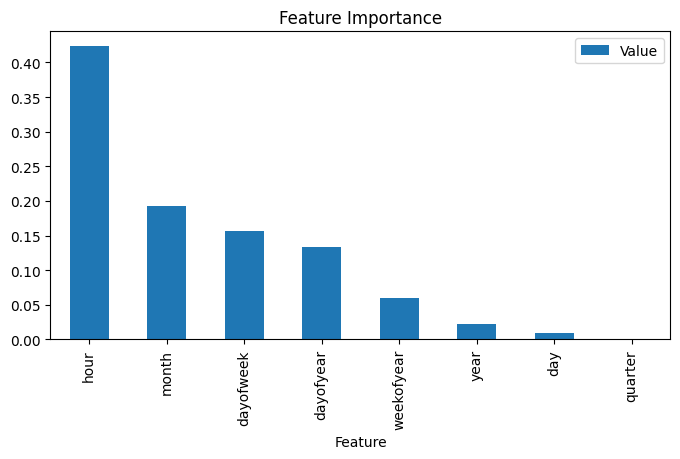

In [ ]:
#features importances

# Use x_train or x_test instead of x
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, x_train.columns)), columns=['Value','Feature'])
feature_imp = feature_imp.sort_values(by='Value', ascending=False)
feature_imp
feature_imp.plot(kind='bar', x='Feature', y='Value', figsize=(8,4),title='Feature Importance')
plt.show()

Analysis and Conclusion:

    Hour (0.423716):
        Importance: This is the most significant feature.
        Implications: Energy consumption varies greatly depending on the time of day. Peak hours likely correspond to high energy usage times, such as early morning and evening when people are home and active.

    Month (0.193156):
        Importance: The second most important feature.
        Implications: Different months can have varying energy demands due to seasonal changes. For instance, winter months may see higher energy consumption due to heating needs.

    Day of the Week (0.156915):
        Importance: This feature is also quite significant.
        Implications: Weekdays and weekends show different energy usage patterns, possibly due to changes in industrial activity and residential behavior.

    Day of the Year (0.134000):
        Importance: Moderately important.
        Implications: This feature captures seasonal trends and holidays that can impact energy usage.

    Week of the Year (0.060241):
        Importance: Less significant but still relevant.
        Implications: This can be useful for capturing weekly patterns and anomalies, such as a specific week having unusual weather.

    Year (0.022281):
        Importance: Not very significant.
        Implications: Yearly trends might not vary much or are already captured by other time-related features.

    Day (0.009691):
        Importance: Least important among the non-zero features.
        Implications: The specific day of the month has minimal impact on energy consumption patterns compared to other features.

    Quarter (0.000000):
        Importance: Not significant at all.
        Implications: The quarter of the year doesn't provide any additional value beyond what's already captured by other time-related features.

In [ ]:
#Forecast/Prediction

test['prediction'] = model.predict(x_test)
test.head()

,Datetime,PJME_MW,hour,day,dayofweek,month,year,dayofyear,quarter,weekofyear,prediction
Datetime,,,,,,,,,,,
2015-01-01 00:00:00,2015-01-01 00:00:00,32802.0,0,1,3,1,2015,1,1,1,32243.339844
2015-12-31 01:00:00,2015-12-31 01:00:00,24305.0,1,31,3,12,2015,365,4,53,29146.919922
2015-12-31 02:00:00,2015-12-31 02:00:00,23156.0,2,31,3,12,2015,365,4,53,27878.279297
2015-12-31 03:00:00,2015-12-31 03:00:00,22514.0,3,31,3,12,2015,365,4,53,27603.382812
2015-12-31 04:00:00,2015-12-31 04:00:00,22330.0,4,31,3,12,2015,365,4,53,27603.382812


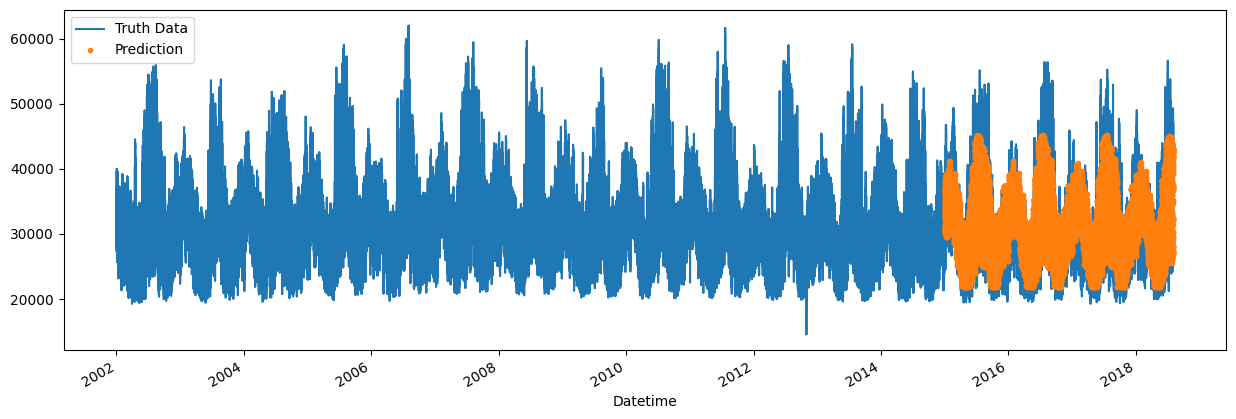

In [ ]:
# Plot the 'PJME_MW' column from the 'data' DataFrame
ax = data[['PJME_MW']].plot(figsize=(15,5))

# Plot the 'prediction' column from the 'test' DataFrame on the same axes
test['prediction'].plot(ax=ax, style='.')  # Use '.' style for the prediction line

# Add a legend to distinguish between the two lines
plt.legend(['Truth Data', 'Prediction'])

# Display the plot
plt.show()


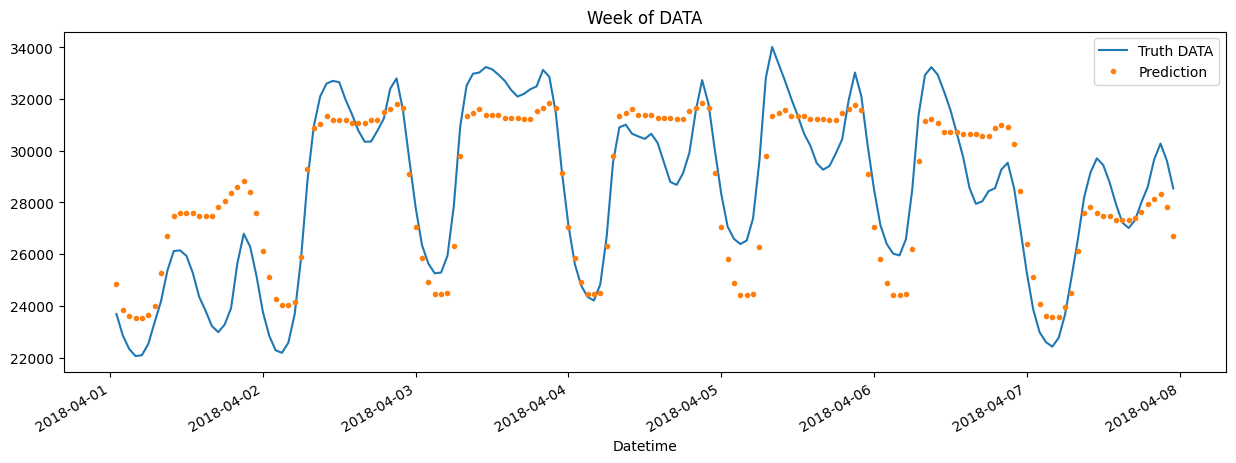

In [ ]:
#predicting for the week
ax = data.loc[(data.index > '2018-04-01') & (data.index < '2018-04-08')]['PJME_MW'].plot(figsize=(15,5), title = 'Week of DATA')

# Use test DataFrame here instead of data
test.loc[(test.index > '2018-04-01') & (test.index < '2018-04-08')]['prediction'].plot(style='.', ax=ax) # Plot on the same axes

plt.legend(['Truth DATA', 'Prediction'])
plt.show()

In [ ]:
#evaluation
evaluation = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(f'The RSME is: {evaluation:0.2f}')

The RSME is: 3741.57


### The model's performance was evaluated using RMSE and  achieved an RMSE of 3741.57 and an MAE of 2950.23 on the test set.

**Error Analysis**

In [ ]:
#calculate the error


test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(by=['date'])['error'].mean().sort_values(ascending=False).head(10)


date
2016-08-13    13672.526449
2016-08-14    13456.660807
2016-09-10    11073.900309
2016-08-12    10665.421712
2018-01-06    10648.232340
2016-09-09    10524.319824
2015-02-20    10524.132731
2018-01-07     9395.057861
2017-05-19     9386.738118
2015-02-16     9378.161540
Name: error, dtype: float64

## CONCLUSION :  The model effectively predicts energy consumption under normal conditions but can be improved by incorporating additional weather variables. Future work could also explore the use of ensemble methods to enhance predictive performance.